<a href="https://colab.research.google.com/github/KyleZhao24/CRE-PriceFactors-Python/blob/main/CRE_PriceFactors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from full_fred.fred import Fred

fred = Fred('/content/drive/MyDrive/Colab Notebooks/CCBNY internship/Api Key/Copy of API_Fred.txt')
fred.get_api_key_file()


'/content/drive/MyDrive/Colab Notebooks/CCBNY internship/Api Key/Copy of API_Fred.txt'

In [ ]:
!pip install full-fred
!pip install dataframe-image

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas_datareader as pdr

# crep

In [ ]:
#Interest Rates and Price Indexes; Commercial Real Estate Price Index, Level (BOGZ1FL075035503Q)
crep = fred.get_series_df('BOGZ1FL075035503Q')

crep.tail()

#Drop unnecessary columns, set index to date
crep = crep.drop(columns = ['realtime_start', 'realtime_end'])

#Rename column and set the unit
crep = crep.rename(columns={'value': 'Commercial Real Estate Price Index ($ Million)'})


crep.tail()

,date,Commercial Real Estate Price Index ($ Million)
305,2022-01-01,348208.0
306,2022-04-01,346646.0
307,2022-07-01,352401.0
308,2022-10-01,351240.0
309,2023-01-01,350803.0


In [ ]:
# Convert 'Commercial Real Estate Price Index ($ Million)' to numeric
crep['Commercial Real Estate Price Index ($ Million)'] = pd.to_numeric(crep['Commercial Real Estate Price Index ($ Million)'], errors='coerce')

# Convert 'Commercial Real Estate Price Index ($ Million)' to billion
crep['Commercial Real Estate Price Index ($ Billion)'] = crep['Commercial Real Estate Price Index ($ Million)'] / 1000

# After converting, you may want to drop the original column to avoid confusion
crep = crep.drop(columns=['Commercial Real Estate Price Index ($ Million)'])

crep.tail()

,date,Commercial Real Estate Price Index ($ Billion)
305,2022-01-01,348.208
306,2022-04-01,346.646
307,2022-07-01,352.401
308,2022-10-01,351.240
309,2023-01-01,350.803


In [ ]:
crep.reset_index(level=0, inplace=True)

# Convert the list of dictionaries to a dataframe
crep_csv = pd.DataFrame(crep)

# Write data to CSV file
crep_csv.to_csv('crep_csv.csv', columns=['date', 'Commercial Real Estate Price Index ($ Billion)'], index=False)

# ffer

In [ ]:
#Federal Funds Effective Rate (RIFSPFFNB)
ffer = fred.get_series_df('RIFSPFFNB')

#Drop unnecessary columns, set index to date
ffer = ffer.drop(columns = ['realtime_start', 'realtime_end'])

#Rename column and set the unit
ffer = ffer.rename(columns={'value': 'Federal Funds Effective Rate (Percent %)'})
ffer.tail()

,date,Federal Funds Effective Rate (Percent %)
18017,2023-07-24,5.08
18018,2023-07-25,5.08
18019,2023-07-26,5.08
18020,2023-07-27,5.33
18021,2023-07-28,5.33


In [ ]:
ffer.reset_index(level=0, inplace=True)

# Convert the list of dictionaries to a dataframe
ffer_csv = pd.DataFrame(ffer)

# Write data to CSV file
ffer_csv.to_csv('ffer_csv.csv', columns=['date', 'Federal Funds Effective Rate (Percent %)'], index=False)



# ur

In [ ]:
#Fetch Data (Unemployment Rate)
ur = fred.get_series_df('UNRATE')

ur.tail()

#Drop unnecessary columns, set index to date
ur = ur.drop(columns = ['realtime_start', 'realtime_end'])


#Rename column and set the unit
ur = ur.rename(columns={'value': 'Unemployment Rate (Percent %)'})


ur.tail()

,date,Unemployment Rate (Percent %)
901,2023-02-01,3.6
902,2023-03-01,3.5
903,2023-04-01,3.4
904,2023-05-01,3.7
905,2023-06-01,3.6


In [ ]:
ur.reset_index(level=0, inplace=True)

# Convert the list of dictionaries to a dataframe
ur_csv = pd.DataFrame(ur)

# Write data to CSV file
ur_csv.to_csv('ur_csv.csv', columns=['date', 'Unemployment Rate (Percent %)'], index=False)

# Total Revenue for Real Estate, Establishments Subject to Federal Income Tax

In [ ]:
#Fetch Data (Total Revenue for Real Estate to Federal Income Tax)
reft = fred.get_series_df('REV531TPSA')

reft.tail()

#Drop unnecessary columns, set index to date
reft = reft.drop(columns = ['realtime_start', 'realtime_end'])


#Rename column and set the unit
reft = reft.rename(columns={'value': 'Total Revenue for Real Estate to Federal Income Tax (Percent %)'})


reft.tail()

,date,Total Revenue for Real Estate to Federal Income Tax (Percent %)
37,2022-01-01,1.2
38,2022-04-01,0.8
39,2022-07-01,-0.8
40,2022-10-01,-4.8
41,2023-01-01,8.4


In [ ]:
reft.reset_index(level=0, inplace=True)

# Convert the list of dictionaries to a dataframe
reft_csv = pd.DataFrame(reft)

# Write data to CSV file
reft_csv.to_csv('reft_csv.csv', columns=['date', 'Total Revenue for Real Estate to Federal Income Tax (Percent %)'], index=False)

# Consumer confidence index (CCI)

In [ ]:
cci = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CCBNY internship/DP_LIVE_27062023201144121.csv')


cci_x = cci.iloc[:, -2]
cci_y = cci.iloc[:, -3]

print(cci_x)
print(cci_y)

0      99.38117
1      99.45305
2      99.48612
3      99.56101
4      99.54704
         ...   
108    97.30318
109    97.44296
110    97.33221
111    97.15548
112    96.87728
Name: Value, Length: 113, dtype: float64
0      2014-01
1      2014-02
2      2014-03
3      2014-04
4      2014-05
        ...   
108    2023-01
109    2023-02
110    2023-03
111    2023-04
112    2023-05
Name: TIME, Length: 113, dtype: object


In [ ]:
# Ensure 'cci_y' is a datetime series
cci_y = pd.to_datetime(cci_y, format="%Y-%m")

# Convert your series to a DataFrame and rename column
cci_y_df = cci_y.to_frame()
cci_y_df = cci_y_df.rename(columns={'TIME': 'date'})

# Convert 'cci_x' to a DataFrame and rename column
cci_x_df = cci_x.to_frame()
cci_x_df = cci_x_df.rename(columns={'Value': 'Consumer Confidence Index'})

# Concatenate the two dataframes
cci_df = pd.concat([cci_y_df, cci_x_df], axis=1)
print(cci_df)


          date  Consumer Confidence Index
0   2014-01-01                   99.38117
1   2014-02-01                   99.45305
2   2014-03-01                   99.48612
3   2014-04-01                   99.56101
4   2014-05-01                   99.54704
..         ...                        ...
108 2023-01-01                   97.30318
109 2023-02-01                   97.44296
110 2023-03-01                   97.33221
111 2023-04-01                   97.15548
112 2023-05-01                   96.87728

[113 rows x 2 columns]


In [ ]:
cci_df.reset_index(level=0, inplace=True)

# Convert the list of dictionaries to a dataframe
cci_df_csv = pd.DataFrame(cci_df)

# Write data to CSV file
cci_df_csv.to_csv('cci_df_csv.csv', columns=['date','Consumer Confidence Index'], index=False)

# Federal Surplus or Deficit

In [ ]:
#Fetch Data (Federal Surplus or Deficit)
fd = fred.get_series_df('MTSDS133FMS')

fd.tail()

#Drop unnecessary columns, set index to date
fd = fd.drop(columns = ['realtime_start', 'realtime_end'])


#Rename column and set the unit
fd = fd.rename(columns={'value': 'Federal Surplus or Deficit($ Million)'})


fd.tail()




# Convert 'Federal Surplus or Deficit($ Million)' to numeric
fd['Federal Surplus or Deficit($ Million)'] = pd.to_numeric(fd['Federal Surplus or Deficit($ Million)'], errors='coerce')

# Convert 'Federal Surplus or Deficit($ Million)' to billion
fd['Federal Surplus or Deficit ($ Billion)'] = fd['Federal Surplus or Deficit($ Million)'] / 1000

# After converting, you may want to drop the original column to avoid confusion
fd = fd.drop(columns=['Federal Surplus or Deficit($ Million)'])

fd.tail()

,date,Federal Surplus or Deficit ($ Billion)
508,2023-02-01,-262.433843
509,2023-03-01,-378.076316
510,2023-04-01,176.180790
511,2023-05-01,-240.348240
512,2023-06-01,-227.768413


In [ ]:
fd.reset_index(level=0, inplace=True)

# Convert the list of dictionaries to a dataframe
fd_csv = pd.DataFrame(fd)

# Write data to CSV file
fd_csv.to_csv('fd_csv.csv', columns=['date', 'Federal Surplus or Deficit ($ Billion)'], index=False)

# 5-Year Breakeven Inflation Rate

In [ ]:
#Fetch Data (5-Year Breakeven Inflation Rate)
ir = fred.get_series_df('T5YIE')

ir.tail()

#Drop unnecessary columns, set index to date
ir = ir.drop(columns = ['realtime_start', 'realtime_end'])


#Rename column and set the unit
ir = ir.rename(columns={'value': '5-Year Breakeven Inflation Rate (Percent %)'})


ir.tail()

,date,5-Year Breakeven Inflation Rate (Percent %)
5363,2023-07-25,2.26
5364,2023-07-26,2.24
5365,2023-07-27,2.27
5366,2023-07-28,2.28
5367,2023-07-31,2.27


In [ ]:
ir.reset_index(level=0, inplace=True)

# Convert the list of dictionaries to a dataframe
ir_csv = pd.DataFrame(ir)

# Write data to CSV file
ir_csv.to_csv('ir_csv.csv', columns=['date', '5-Year Breakeven Inflation Rate (Percent %)'], index=False)

# Merge datasets

In [ ]:
# Read in the CSV files
crep_df = pd.read_csv('crep_csv.csv', parse_dates=['date'])
ffer_df = pd.read_csv('ffer_csv.csv', parse_dates=['date'])
ur_df = pd.read_csv('ur_csv.csv', parse_dates=['date'])
reft_df = pd.read_csv('reft_csv.csv', parse_dates=['date'])
cci_df = pd.read_csv('cci_df_csv.csv', parse_dates=['date'])
fd_df = pd.read_csv('fd_csv.csv', parse_dates=['date'])
ir_df = pd.read_csv('ir_csv.csv', parse_dates=['date'])

# Merge the dataframes on the 'date' column
merged_df = crep_df.merge(ffer_df, on='date', how='outer')
merged_df = merged_df.merge(ur_df, on='date', how='outer')
merged_df = merged_df.merge(reft_df, on='date', how='outer')
merged_df = merged_df.merge(cci_df, on='date', how='outer')
merged_df = merged_df.merge(fd_df, on='date', how='outer')
merged_df = merged_df.merge(ir_df, on='date', how='outer')

# Sort the dataframe by 'date'
merged_df.sort_values(by='date', inplace=True)

# Save the result to a new CSV
merged_df.to_csv('merged_df.csv', index=False)




# Data Processing

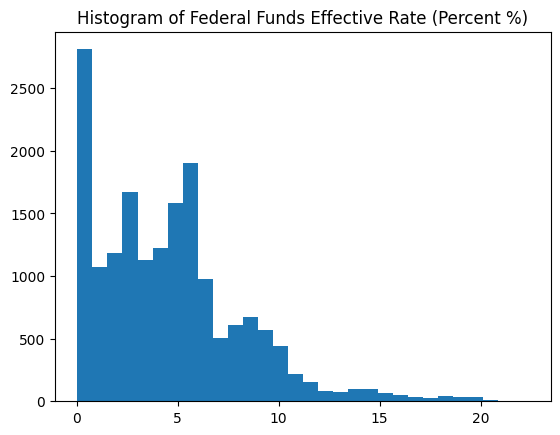

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.9214829802513123, p=0.0
Data of Federal Funds Effective Rate (Percent %) does not look Gaussian (reject H0)


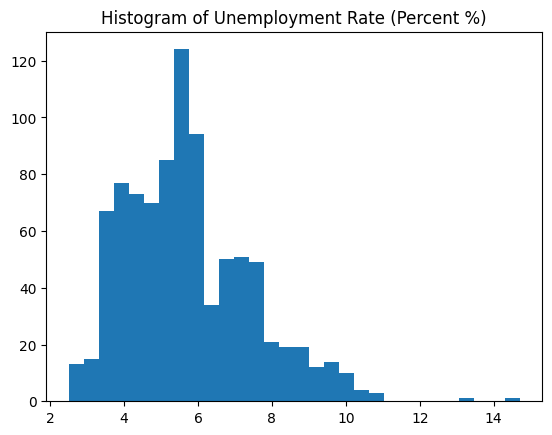

Statistics=0.9571043252944946, p=1.2658625758260557e-15
Data of Unemployment Rate (Percent %) does not look Gaussian (reject H0)


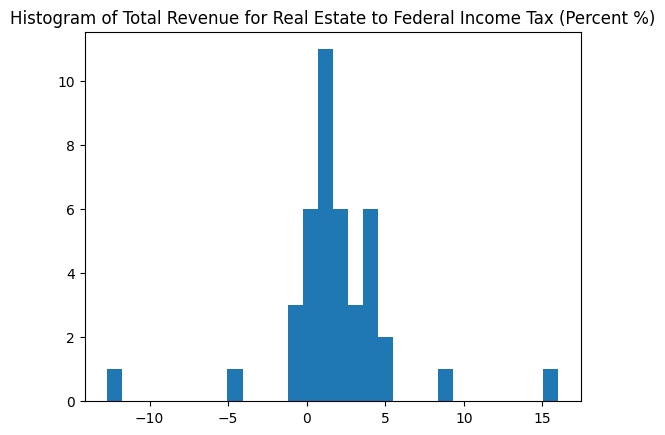

Statistics=0.7817673683166504, p=2.3079992388375103e-06
Data of Total Revenue for Real Estate to Federal Income Tax (Percent %) does not look Gaussian (reject H0)


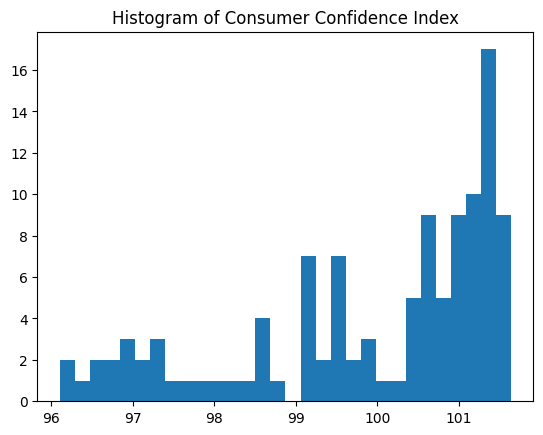

Statistics=0.8609583377838135, p=6.772887584105547e-09
Data of Consumer Confidence Index does not look Gaussian (reject H0)


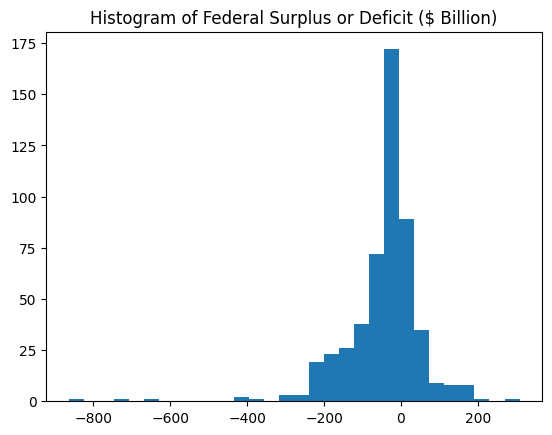

Statistics=0.8243571519851685, p=2.7474068953802893e-23
Data of Federal Surplus or Deficit ($ Billion) does not look Gaussian (reject H0)


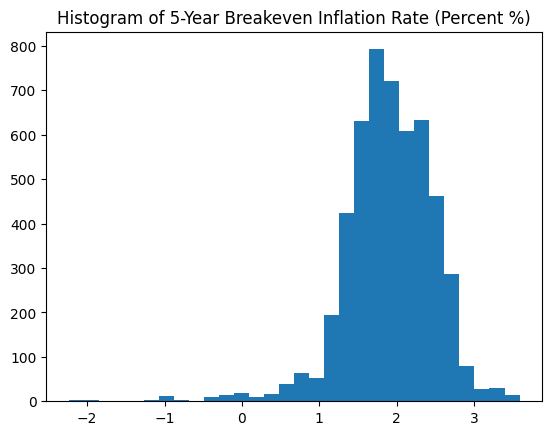

Statistics=0.9378160834312439, p=4.985819936067699e-42
Data of 5-Year Breakeven Inflation Rate (Percent %) does not look Gaussian (reject H0)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

df = pd.read_csv('merged_df.csv')

# Variables of interest
variables = ['Federal Funds Effective Rate (Percent %)',
             'Unemployment Rate (Percent %)',
             'Total Revenue for Real Estate to Federal Income Tax (Percent %)',
             'Consumer Confidence Index',
             'Federal Surplus or Deficit ($ Billion)',
             '5-Year Breakeven Inflation Rate (Percent %)']






# Check distribution and normality
for var in variables:
    # Convert the data to numeric, if it's not already
    df[var] = pd.to_numeric(df[var], errors='coerce')

    # Visualize with histogram for non-null values
    plt.hist(df[var].dropna(), bins=30)
    plt.title(f'Histogram of {var}')
    plt.show()

    # Shapiro-Wilk test for normality for non-null values
    stat, p = shapiro(df[var].dropna())
    print(f'Statistics={stat}, p={p}')
    alpha = 0.05
    if p > alpha:
        print(f'Data of {var} looks Gaussian (fail to reject H0)')
    else:
        print(f'Data of {var} does not look Gaussian (reject H0)')



In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import numpy as np
from sklearn.model_selection import KFold

# Step 1: Load the data
df = pd.read_csv('merged_df.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Step 2: Convert columns to numeric, replacing non-convertible values with NaN
for column in df.columns[1:]:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Step 3: Use KNN for imputing missing values
imputer = KNNImputer(n_neighbors=5)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


# Step 4: Power Transformation of the variables
pt = PowerTransformer(method='yeo-johnson')
X = df.drop(['date', 'Commercial Real Estate Price Index ($ Billion)'], axis=1)
X_transformed = pt.fit_transform(X)
y = df['Commercial Real Estate Price Index ($ Billion)']






# Convert the result back to a DataFrame and assign column names
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)



random_seed = 24


#  splitting  data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=random_seed)

# creating  model
model = XGBRegressor(random_state=random_seed)

# Step 7: Grid search for hyperparameter tuning
parameters = {'nthread':[4],
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

# Define the cross-validation method
cv_method = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Use GridSearchCV with the new cv_method
grid = GridSearchCV(model, parameters, cv=cv_method, n_jobs=5, verbose=True)
grid.fit(X_train, y_train)


# Print the best parameters found
print(grid.best_params_)

# Step 8: Evaluate model
preds = grid.predict(X_test)

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = sqrt(mse)
r2 = r2_score(y_test, preds)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)




Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}
Mean Absolute Error: 3.846912175348711
Mean Squared Error: 160.1878284184967
Root Mean Squared Error: 12.656533033121539
R-squared: 0.9482657105642944


In [ ]:
print(df)

# Save the result to a new CSV
df.to_csv('df.csv', index=False)

            date  Commercial Real Estate Price Index ($ Billion)  \
0     1945-10-01                                       13.205000   
1     1946-01-01                                      110.403928   
2     1946-04-01                                      110.403928   
3     1946-07-01                                      110.403928   
4     1946-10-01                                       12.965000   
...          ...                                             ...   
18341 2023-07-25                                      112.360200   
18342 2023-07-26                                      112.360200   
18343 2023-07-27                                       74.910600   
18344 2023-07-28                                       74.910600   
18345 2023-07-31                                      195.168400   

       Federal Funds Effective Rate (Percent %)  \
0                                       1.55200   
1                                       4.60125   
2                             

In [ ]:
# Get feature importances
importances = grid.best_estimator_.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame to learn which features have the most importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)


                                             feature  importance
0           Federal Funds Effective Rate (Percent %)    0.440180
4             Federal Surplus or Deficit ($ Billion)    0.155788
3                          Consumer Confidence Index    0.138564
5        5-Year Breakeven Inflation Rate (Percent %)    0.128651
1                      Unemployment Rate (Percent %)    0.070086
2  Total Revenue for Real Estate to Federal Incom...    0.066731
